In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.25)
plt.rcParams["figure.figsize"] = [8, 6]

In [2]:
data = pd.read_csv('timings_agg.csv')
categories = pd.read_csv("../../2phase_nsa/categories/job_categories.csv")[["query","well_behaved"]].set_index("query")
data = pd.merge(data, categories, left_on="query", right_index=True)
data

,query,method,duration(s)_mean,duration(s)_median,hashjoin_time(s)_mean,hashjoin_time(s)_median,well_behaved
0,10a,DF-Bin,0.808268,0.807770,0.065077,0.065061,False
112,10a,SYA,0.778226,0.777806,0.034854,0.035224,False
224,10a,DuckDB-Bin,1.024408,0.978643,0.023349,0.022693,False
1,10b,DF-Bin,0.481729,0.481706,0.042303,0.042252,False
113,10b,SYA,0.476152,0.476267,0.036536,0.036787,False
...,...,...,...,...,...,...,...
335,9c,DuckDB-Bin,1.138927,1.131404,0.155080,0.153628,False
111,9d,DF-Bin,0.643600,0.644643,0.299070,0.300148,False
223,9d,SYA,0.526938,0.526714,0.181657,0.181309,False
336,9d,DuckDB-Bin,2.032136,2.019712,1.045339,1.038387,False


In [3]:
# Create one table for each method (DuckDB-Bin, DF-Bin, SYA)
df_bin = data[data["method"] == "DF-Bin"].drop(columns=["method"]).set_index("query")
sya = data[data["method"] == "SYA"].drop(columns=["method"]).set_index("query") 
duckdb_bin = data[data["method"] == "DuckDB-Bin"].drop(columns=["method"]).set_index("query") 

In [4]:
merged = pd.merge(
    pd.merge(duckdb_bin,df_bin, on="query", suffixes=("_duckdbbin", "_dfbin")),
    sya.add_suffix("_sya"), on="query"
).drop(columns=["well_behaved_duckdbbin", "well_behaved_dfbin"]).rename(columns={"well_behaved_sya": "well_behaved"})
merged

,duration(s)_mean_duckdbbin,duration(s)_median_duckdbbin,hashjoin_time(s)_mean_duckdbbin,hashjoin_time(s)_median_duckdbbin,duration(s)_mean_dfbin,duration(s)_median_dfbin,hashjoin_time(s)_mean_dfbin,hashjoin_time(s)_median_dfbin,duration(s)_mean_sya,duration(s)_median_sya,hashjoin_time(s)_mean_sya,hashjoin_time(s)_median_sya,well_behaved
query,,,,,,,,,,,,,
10a,1.024408,0.978643,0.023349,0.022693,0.808268,0.807770,0.065077,0.065061,0.778226,0.777806,0.034854,0.035224,False
10b,0.868753,0.861319,0.019812,0.019508,0.481729,0.481706,0.042303,0.042252,0.476152,0.476267,0.036536,0.036787,False
10c,1.132094,1.121761,0.182219,0.180219,0.740892,0.740221,0.243381,0.242953,0.609768,0.609623,0.112533,0.112749,False
11a,0.119697,0.118126,0.002360,0.002389,0.077794,0.077833,0.002536,0.002565,0.076912,0.076872,0.001844,0.001844,False
11b,0.126528,0.123618,0.011015,0.010953,0.046686,0.046591,0.015409,0.015208,0.044636,0.044656,0.013228,0.013132,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8d,2.253939,2.223370,1.939751,1.913963,2.548468,2.547300,2.381475,2.380463,0.615817,0.615394,0.445329,0.445232,True
9a,1.187696,1.183863,0.089564,0.088296,0.605991,0.606510,0.112905,0.112869,0.572789,0.573454,0.077298,0.077478,False
9b,0.788807,0.783606,0.036458,0.036031,0.348056,0.348185,0.040717,0.040730,0.361744,0.361259,0.052471,0.052342,False


In [5]:
# median and average runtimes
mean_median = pd.DataFrame({
    "median": merged.median(axis=0),
    "mean": merged.mean(axis=0)}
)
mean_median

,median,mean
duration(s)_mean_duckdbbin,0.647707,0.776982
duration(s)_median_duckdbbin,0.640342,0.771853
hashjoin_time(s)_mean_duckdbbin,0.089113,0.236242
hashjoin_time(s)_median_duckdbbin,0.087960,0.234730
duration(s)_mean_dfbin,0.395086,0.488003
duration(s)_median_dfbin,0.395375,0.487468
hashjoin_time(s)_mean_dfbin,0.088556,0.184745
hashjoin_time(s)_median_dfbin,0.088692,0.184399
duration(s)_mean_sya,0.362450,0.401675
duration(s)_median_sya,0.362070,0.401472


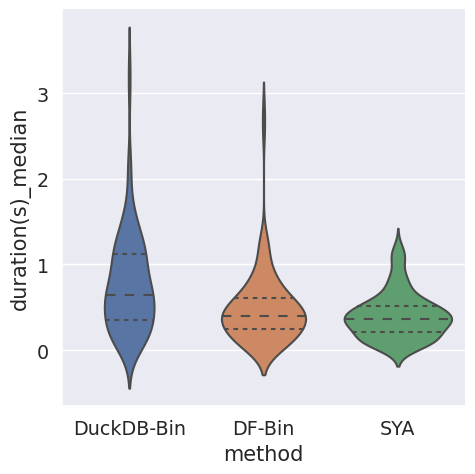

In [6]:
methods_order = ["DuckDB-Bin", "DF-Bin", "SYA"]
sns.catplot(data=data, x="method", y="duration(s)_median", order=methods_order, kind="violin", inner="quart")

In [7]:
mean_median.loc[mean_median.index.str.startswith("duration(s)_median")][["mean"]].transpose()

,duration(s)_median_duckdbbin,duration(s)_median_dfbin,duration(s)_median_sya
mean,0.771853,0.487468,0.401472


In [8]:
mean_median.loc[mean_median.index.str.startswith("duration(s)_median")][["median"]].transpose()

,duration(s)_median_duckdbbin,duration(s)_median_dfbin,duration(s)_median_sya
median,0.640342,0.395375,0.36207


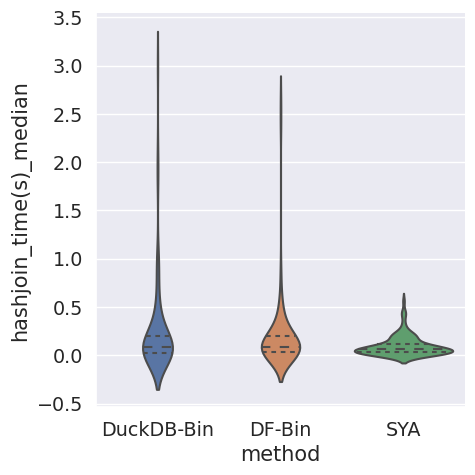

In [9]:
sns.catplot(data=data, x="method", y="hashjoin_time(s)_median", order=methods_order, kind="violin", inner="quart")

In [10]:
mean_median.loc[mean_median.index.str.startswith("hashjoin_time(s)_median")][["mean"]].transpose()

,hashjoin_time(s)_median_duckdbbin,hashjoin_time(s)_median_dfbin,hashjoin_time(s)_median_sya
mean,0.23473,0.184399,0.097875


In [11]:
mean_median.loc[mean_median.index.str.startswith("hashjoin_time(s)_median")][["median"]].transpose()

,hashjoin_time(s)_median_duckdbbin,hashjoin_time(s)_median_dfbin,hashjoin_time(s)_median_sya
median,0.08796,0.088692,0.06346


In [12]:
def scatterplot(data, x, y, label_col: str|None = None, min=1e-4, max=1e1):
    if label_col is not None:
        ax = sns.scatterplot(data, x=x, y=y, hue=data[label_col])
    else:
        ax = sns.scatterplot(data, x=x, y=y)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot([min, max], [min, max], color='grey', linestyle='-', alpha=0.5)
    return ax

def print_speedups(data: pd.DataFrame, x: str, y: str):
    max_slowdown = (data[y] / data[x]).max()
    max_slowdown_query = data[data[y] / data[x] == max_slowdown].index[0]
    x_time = data.loc[max_slowdown_query, x]
    y_time = data.loc[max_slowdown_query, y]
    print("Max. slowdown:      {:.3f}x \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_slowdown, max_slowdown_query, x_time, y_time))

    max_abs_slowdown = (data[y] - data[x]).max()
    max_abs_slowdown_query = data[(data[y] - data[x]) == max_abs_slowdown].index[0]
    x_time = data.loc[max_abs_slowdown_query, x]
    y_time = data.loc[max_abs_slowdown_query, y]
    print("Max. abs. slowdown: {:.3f}s \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_abs_slowdown, max_abs_slowdown_query, x_time, y_time))

    max_speedup = (data[x] / data[y]).max()
    max_speedup_query = data[data[x] / data[y] == max_speedup].index[0]
    x_time = data.loc[max_speedup_query, x]
    y_time = data.loc[max_speedup_query, y]
    print("Max. speedup:       {:.3f}x \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_speedup, max_speedup_query, x_time, y_time))

    max_abs_speedup = (data[x] - data[y]).max()
    max_abs_speedup_query = data[(data[x] - data[y]) == max_abs_speedup].index[0]
    x_time = data.loc[max_abs_speedup_query, x]
    y_time = data.loc[max_abs_speedup_query, y]
    print("Max. abs. speedup:  {:.3f}s \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_abs_speedup, max_abs_speedup_query, x_time, y_time))
    print("-----------------------------------------------")

def print_stats(ratio_col: pd.Series, epsilon: float = 0.01):
    n_rows = len(ratio_col)
    n_above = ratio_col[ratio_col > 1+epsilon].shape[0]
    n_below = ratio_col[ratio_col < 1-epsilon].shape[0]
    n_equal = ratio_col[(ratio_col >= 1-epsilon) & (ratio_col <= 1+epsilon)].shape[0]

    print(f"Total: {n_rows}, epsilon: {epsilon}")
    print("Number of dots above the line:", n_above, f"({n_above/n_rows*100:.2f}%)")
    print("Number of dots below the line:", n_below , f"({n_below/n_rows*100:.2f}%)")
    print("Number of dots on the line", n_equal, f"({n_equal/n_rows*100:.2f}%)")

## DuckDB vs DataFusion

Total: 112, epsilon: 0.01
Number of dots above the line: 61 (54.46%)
Number of dots below the line: 50 (44.64%)
Number of dots on the line 1 (0.89%)


<Axes: xlabel='hashjoin_time(s)_median_duckdbbin', ylabel='hashjoin_time(s)_median_dfbin'>

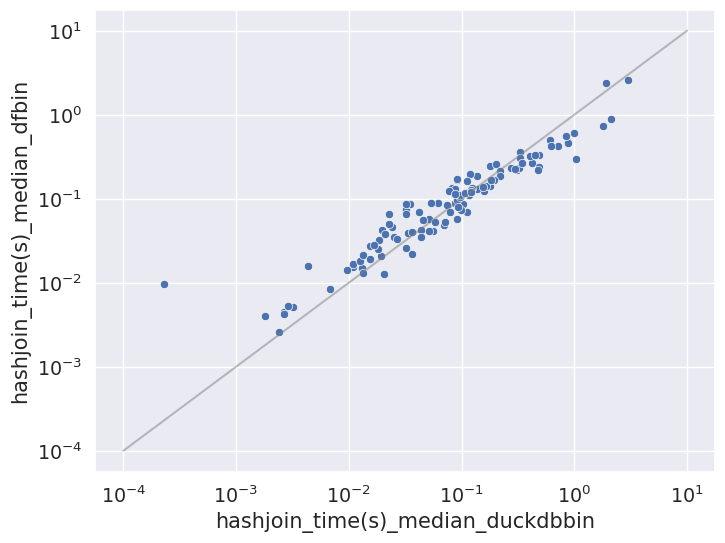

In [13]:
x = "hashjoin_time(s)_median_duckdbbin"
y = "hashjoin_time(s)_median_dfbin"
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y)

Total: 112, epsilon: 0.01
Number of dots above the line: 7 (6.25%)
Number of dots below the line: 104 (92.86%)
Number of dots on the line 1 (0.89%)


<Axes: xlabel='duration(s)_median_duckdbbin', ylabel='duration(s)_median_dfbin'>

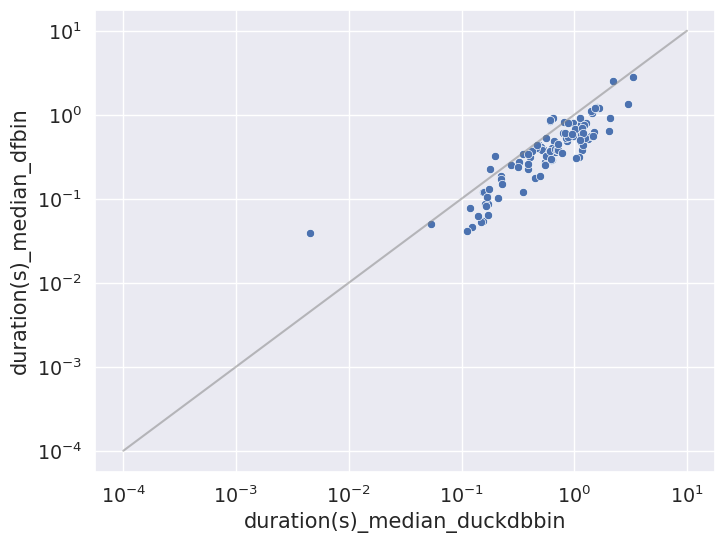

In [14]:
x = "duration(s)_median_duckdbbin"
y = "duration(s)_median_dfbin"
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y)

## DF-Bin v.s. SYA

In [15]:
merged.loc[["33c","11d","8c"]][["duration(s)_median_dfbin","duration(s)_median_sya","hashjoin_time(s)_median_dfbin", "hashjoin_time(s)_median_sya"]]

,duration(s)_median_dfbin,duration(s)_median_sya,hashjoin_time(s)_median_dfbin,hashjoin_time(s)_median_sya
query,,,,
33c,0.129864,0.211436,0.024940,0.103288
11d,0.386779,0.127016,0.267383,0.007591
8c,2.801305,0.744274,2.620566,0.562547


Max. slowdown:      4.141x 	(query 33c, x=0.025s, y=0.103s)
Max. abs. slowdown: 0.078s 	(query 33c, x=0.025s, y=0.103s)
Max. speedup:       35.225x 	(query 11d, x=0.267s, y=0.008s)
Max. abs. speedup:  2.058s 	(query 8c, x=2.621s, y=0.563s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 8 (7.14%)
Number of dots below the line: 103 (91.96%)
Number of dots on the line 1 (0.89%)


<Axes: xlabel='hashjoin_time(s)_median_dfbin', ylabel='hashjoin_time(s)_median_sya'>

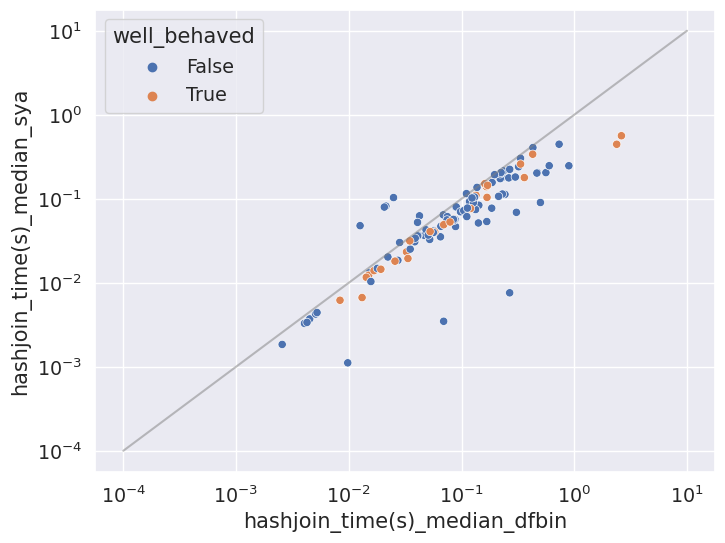

In [16]:
x = "hashjoin_time(s)_median_dfbin"
y = "hashjoin_time(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")

Max. slowdown:      1.853x 	(query 32b, x=0.042s, y=0.078s)
Max. abs. slowdown: 0.082s 	(query 33c, x=0.130s, y=0.211s)
Max. speedup:       4.139x 	(query 8d, x=2.547s, y=0.615s)
Max. abs. speedup:  2.057s 	(query 8c, x=2.801s, y=0.744s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 8 (7.14%)
Number of dots below the line: 92 (82.14%)
Number of dots on the line 12 (10.71%)


<Axes: xlabel='duration(s)_median_dfbin', ylabel='duration(s)_median_sya'>

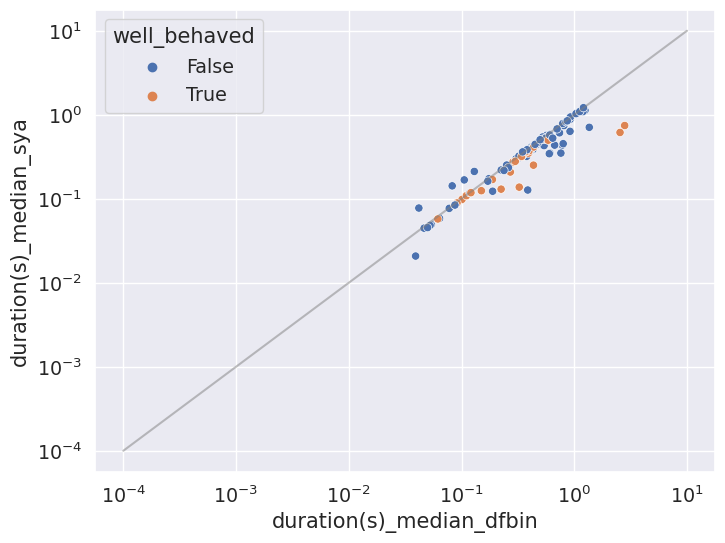

In [17]:
x = "duration(s)_median_dfbin"
y = "duration(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")

## DuckDB-Bin v.s. SYA

In [18]:
# merged.loc[["33c","11d","8c"]][["duration(s)_median_dfbin","duration(s)_median_sya","hashjoin_time(s)_median_dfbin", "hashjoin_time(s)_median_sya"]]

Max. slowdown:      6.053x 	(query 33a, x=0.014s, y=0.082s)
Max. abs. slowdown: 0.085s 	(query 33c, x=0.018s, y=0.103s)
Max. speedup:       55.915x 	(query 11d, x=0.424s, y=0.008s)
Max. abs. speedup:  2.440s 	(query 8c, x=3.003s, y=0.563s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 42 (37.50%)
Number of dots below the line: 69 (61.61%)
Number of dots on the line 1 (0.89%)


<Axes: xlabel='hashjoin_time(s)_median_duckdbbin', ylabel='hashjoin_time(s)_median_sya'>

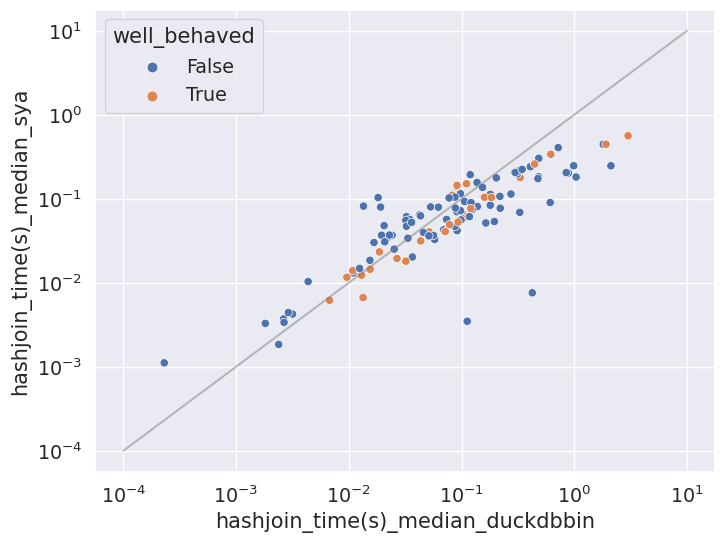

In [19]:
x = "hashjoin_time(s)_median_duckdbbin"
y = "hashjoin_time(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")

Max. slowdown:      4.609x 	(query 32a, x=0.005s, y=0.021s)
Max. abs. slowdown: 0.237s 	(query 15c, x=0.645s, y=0.881s)
Max. speedup:       4.462x 	(query 8c, x=3.321s, y=0.744s)
Max. abs. speedup:  2.576s 	(query 8c, x=3.321s, y=0.744s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 5 (4.46%)
Number of dots below the line: 106 (94.64%)
Number of dots on the line 1 (0.89%)


<Axes: xlabel='duration(s)_median_duckdbbin', ylabel='duration(s)_median_sya'>

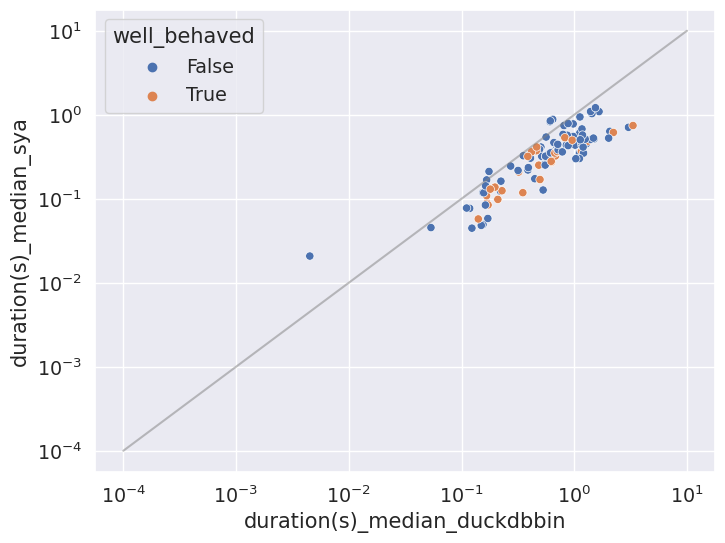

In [20]:
x = "duration(s)_median_duckdbbin"
y = "duration(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")